In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset without a header initially
df = pd.read_csv("boston_house_prices.csv", header=None)

# Set the column names based on the dataset documentation
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

# Drop the first row which was likely a descriptive header
df = df[1:]

# Convert columns to numeric, coercing errors
df = df.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Look at the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

       CRIM         ZN      INDUS     CHAS       NOX        RM        AGE  \
0  3.613524  11.363636  11.136779  0.06917  0.554695  6.284634  68.574901   
1  0.006320  18.000000   2.310000  0.00000  0.538000  6.575000  65.200000   
2  0.027310   0.000000   7.070000  0.00000  0.469000  6.421000  78.900000   
3  0.027290   0.000000   7.070000  0.00000  0.469000  7.185000  61.100000   
4  0.032370   0.000000   2.180000  0.00000  0.458000  6.998000  45.800000   

        DIS       RAD         TAX    PTRATIO           B      LSTAT       MEDV  
0  3.795043  9.549407  408.237154  18.455534  356.674032  12.653063  22.532806  
1  4.090000  1.000000  296.000000  15.300000  396.900000   4.980000  24.000000  
2  4.967100  2.000000  242.000000  17.800000  396.900000   9.140000  21.600000  
3  4.967100  2.000000  242.000000  17.800000  392.830000   4.030000  34.700000  
4  6.062200  3.000000  222.000000  18.700000  394.630000   2.940000  33.400000  
CRIM       0
ZN         0
INDUS      0
CHAS       0

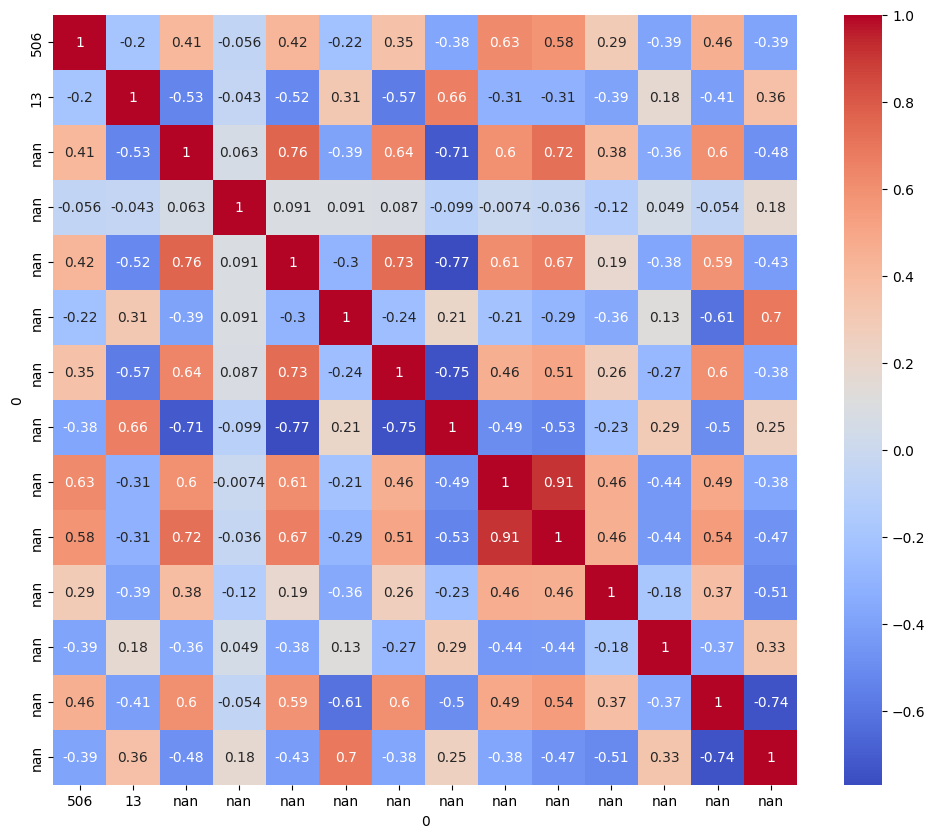

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# X and y are created from the imputed df
X = df.drop("MEDV", axis=1)  # MEDV = target column (house price)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 21.814371484918322
R2 Score: 0.7266133487501432


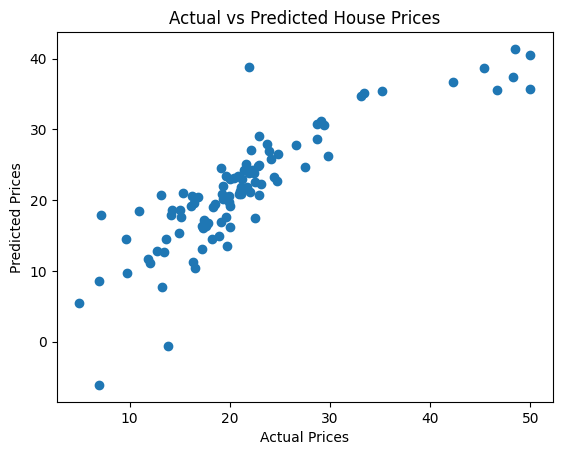

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
